In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("book.csv",encoding = 'latin-1')
df

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [3]:
df.shape

(10000, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [5]:
df.isnull().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [6]:
df.duplicated().sum()


0

In [7]:
df.drop(df.columns[[0]],axis=1,inplace =True)
df

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [8]:
df.nunique()

User.ID        2182
Book.Title     9659
Book.Rating      10
dtype: int64

In [9]:
df = df.rename({'User.ID':'User_ID','Book.Title':'Book_tittle','Book.Rating':'Rating'},axis=1)
df.head()

,User_ID,Book_tittle,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [10]:
df = df.sort_values('User_ID') 
df

,User_ID,Book_tittle,Rating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
...,...,...,...
2395,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,278854,Celtic Mythology (Library of the World's Myths...,8
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7


In [11]:
len(df.User_ID.unique())

2182

In [12]:
len(df.User_ID.unique())

2182

In [13]:
len(df.Book_tittle.unique())

9659

In [14]:
df.loc[df["Rating"] == 'small', 'Rating'] = 0
df.loc[df["Rating"] == 'large', 'Rating'] = 1

In [15]:
df.Rating.value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Rating, dtype: int64

<Axes: xlabel='Rating', ylabel='Density'>

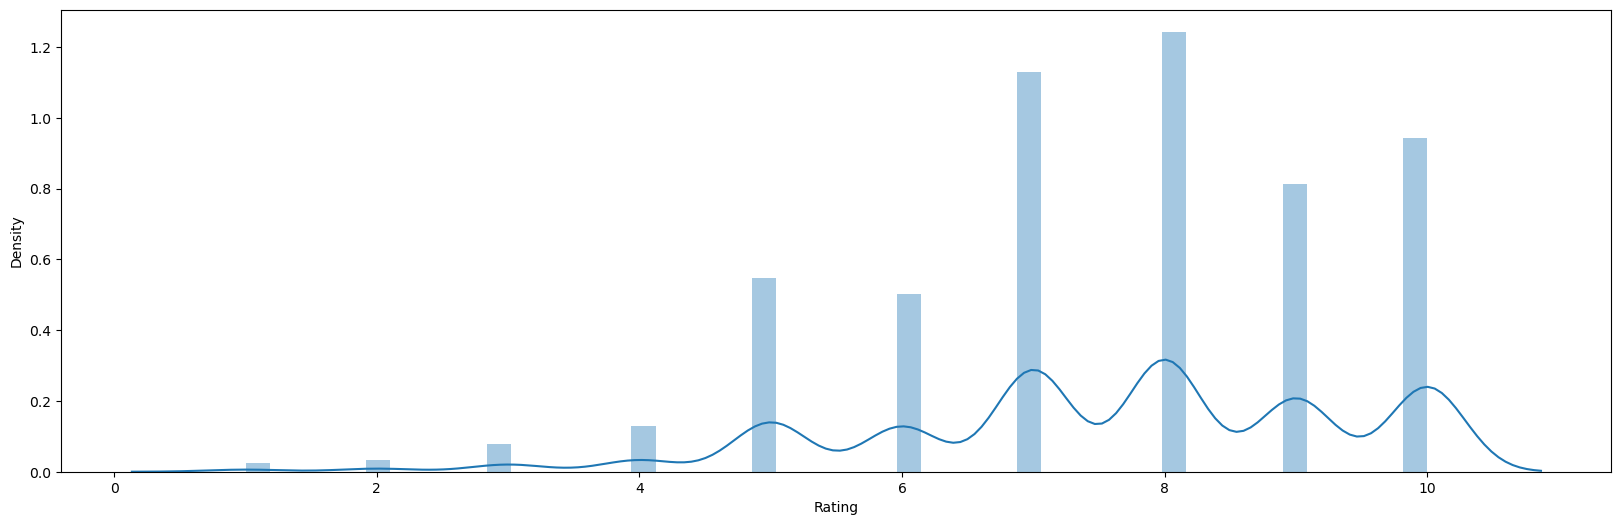

In [16]:
plt.figure(figsize=(20,6))
sns.distplot(df.Rating)

In [17]:
book_df = df.pivot_table(index='User_ID',columns='Book_tittle',values='Rating').reset_index(drop=True)

In [18]:
book_df.fillna(0,inplace=True)
book_df

Book_tittle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
AVG = df['Rating'].mean()
print(AVG)

7.5663


In [20]:
Min = df['Rating'].quantile(0.90)
print(Min)

10.0


In [21]:
from sklearn.metrics import pairwise_distances
sim = 1 - pairwise_distances(book_df.values,metric='cosine')

In [22]:
sim.shape

(2182, 2182)

In [23]:
book_sim_df = pd.DataFrame(sim)
book_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
book_sim_df.index = df.User_ID.unique()
book_sim_df.columns = df.User_ID.unique()

In [25]:
book_sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
np.fill_diagonal(sim,0)
book_sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
print(book_sim_df.idxmax(axis=1)[1348])
print(book_sim_df.max(axis=1).sort_values(ascending=False).head(30))

2576
3951      1.000000
1559      1.000000
162063    1.000000
278206    1.000000
2070      1.000000
2355      1.000000
277284    1.000000
278161    1.000000
276934    1.000000
278131    1.000000
278110    1.000000
162004    1.000000
705       1.000000
698       1.000000
160926    1.000000
933       1.000000
1326      1.000000
2576      1.000000
276850    1.000000
3952      1.000000
161645    1.000000
1348      0.752577
276780    0.707107
86        0.707107
278675    0.668965
276800    0.668965
277244    0.662266
278244    0.662266
278197    0.613941
278013    0.613941
dtype: float64


In [28]:
reader1 = df[(df['User_ID']==1348) | (df['User_ID']==2576)]
reader1

,User_ID,Book_tittle,Rating
3915,1348,Fantastic Beasts and Where to Find Them,7
3916,1348,Stardust,8
5699,2576,Stardust,10


In [29]:
reader2 = df[(df['User_ID']==1348)] 
reader2

,User_ID,Book_tittle,Rating
3915,1348,Fantastic Beasts and Where to Find Them,7
3916,1348,Stardust,8


In [30]:
reader3 = df[(df['User_ID']==2576)] 
reader3

,User_ID,Book_tittle,Rating
5699,2576,Stardust,10


In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

In [32]:
df = pd.read_csv("ratings_Electronics.csv")
df

,userId,productId,rating,timestamp
0,A2CX7LUOHB2NDG,321732944,5,1341100800
1,A2NWSAGRHCP8N5,439886341,1,1367193600
2,A2WNBOD3WNDNKT,439886341,3,1374451200
3,A1GI0U4ZRJA8WN,439886341,1,1334707200
4,A1QGNMC6O1VW39,511189877,5,1397433600
...,...,...,...,...
1048570,A1H16CBCNEL4G3,B000IF51UQ,5,1356739200
1048571,A1C2OANTC49AQI,B000IF51UQ,5,1382486400
1048572,A2JL0387FDDFS,B000IF51UQ,5,1340409600
1048573,A2KIYE5RF0OEMY,B000IF51UQ,4,1391212800


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1048575 non-null  object
 1   productId  1048575 non-null  object
 2   rating     1048575 non-null  int64 
 3   timestamp  1048575 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 32.0+ MB


In [34]:
df.describe()

,rating,timestamp
count,1.048575e+06,1.048575e+06
mean,3.973379e+00,1.248822e+09
std,1.399329e+00,1.091615e+08
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.169078e+09
50%,5.000000e+00,1.250035e+09
75%,5.000000e+00,1.355789e+09
max,5.000000e+00,1.406074e+09


In [35]:
df.isnull().sum()

userId       0
productId    0
rating       0
timestamp    0
dtype: int64

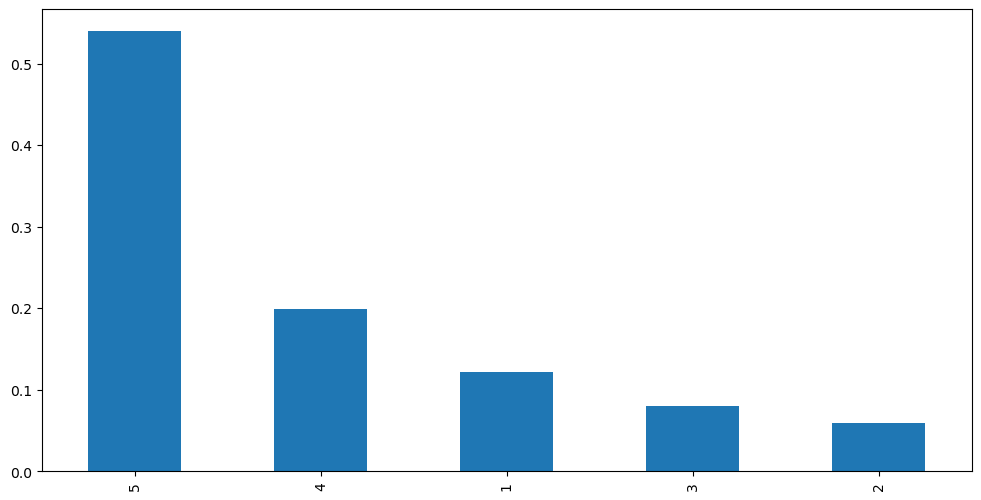

In [36]:
plt.figure(figsize = (12,6))
df['rating'].value_counts(1).plot(kind='bar')
plt.show()

In [37]:
print('Number of unique USERS in Raw data = ', df['userId'].nunique())
print('Number of unique ITEMS in Raw data = ', df['productId'].nunique())

Number of unique USERS in Raw data =  786329
Number of unique ITEMS in Raw data =  61893


In [38]:
most_rated = df.groupby('userId').size().sort_values(ascending = False)[:10]
most_rated

userId
A5JLAU2ARJ0BO     412
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      146
AT6CZDCP4TRGA     128
AKT8TGIT6VVZ5     122
A11D1KHM7DVOQK    112
A2B7BUH8834Y6M    103
A3OXHLG6DIBRW8     95
A203OCQQ12MAVT     90
dtype: int64

In [39]:
counts = df['userId'].value_counts()
df_final = df[df['userId'].isin(counts[counts >= 50].index)]

In [40]:
print('The number of observations in the final data =', len(df_final))
print('Number of unique USERS in the final data = ', df_final['userId'].nunique())
print('Number of unique PRODUCTS in the final data = ', df_final['productId'].nunique())

The number of observations in the final data = 3456
Number of unique USERS in the final data =  38
Number of unique PRODUCTS in the final data =  2943


In [41]:
final_ratings_matrix = df_final.pivot(index = 'userId', columns ='productId', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

Shape of final_ratings_matrix:  (38, 2943)


In [42]:
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

given_num_of_ratings =  3456


In [43]:
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

possible_num_of_ratings =  111834


In [44]:
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

density: 3.09%


In [45]:
average_rating = df_final.groupby(['productId']).mean().rating
print(average_rating.head())

productId
1400532655    1.0
1400599997    1.0
9043413585    3.0
998376234X    1.0
B000000O48    5.0
Name: rating, dtype: float64


In [46]:
count_rating = df_final.groupby(['productId']).count().rating

In [47]:
final_rating = pd.DataFrame(pd.concat([average_rating,count_rating], axis = 1))
final_rating.columns=["Average Rating", "Ratings Count"]

In [48]:
final_rating = final_rating.sort_values(by='Average Rating', ascending=False)

In [49]:
def top_n_products(final_rating, n, min_interaction):
    recommendations = final_rating[final_rating['Ratings Count'] >= min_interaction]
    recommendations = recommendations.sort_values(by='Average Rating', ascending=False)
    return recommendations.index[:n]

In [50]:
list(top_n_products(final_rating, 5, 50))

[]

In [51]:
list(top_n_products(final_rating, 5, 100))

[]

In [52]:
final_ratings_matrix.head()

productId,1400532655,1400599997,9043413585,998376234X,B000000O48,B000001OL6,B000001OMI,B000001OMN,B00000DM9W,B00000J05A,...,B000I992XY,B000I9B2AA,B000IALP88,B000IBRX4M,B000ICZZJG,B000IDCDZY,B000IDWDKO,B000IE5XIC,B000IE8Z4Q,B000IF4788
userId,,,,,,,,,,,,,,,,,,,,,
A11D1KHM7DVOQK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DLJESJKM1OQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1435P5AMCPB3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A149RNR5RH19YY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A15QYHQH80W30L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

final_ratings_matrix.head()

productId,1400532655,1400599997,9043413585,998376234X,B000000O48,B000001OL6,B000001OMI,B000001OMN,B00000DM9W,B00000J05A,...,B000I992XY,B000I9B2AA,B000IALP88,B000IBRX4M,B000ICZZJG,B000IDCDZY,B000IDWDKO,B000IE5XIC,B000IE8Z4Q,B000IF4788
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]):
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])
        similarity.append((user, sim))
        
    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [Tuple[0] for Tuple in similarity] 
    similarity_score = [Tuple[1] for Tuple in similarity]   
   
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])
       
    return most_similar_users, similarity_score


In [61]:
similar = similar_users(3, final_ratings_matrix)[0][0:10]
similar

[28, 25, 34, 14, 29, 30, 13, 24, 11, 0]

In [62]:
similar_users(3,final_ratings_matrix)[1][0:10]

[array([[0.03297923]]),
 array([[0.02837639]]),
 array([[0.02366796]]),
 array([[0.0194539]]),
 array([[0.01888701]]),
 array([[0.01874071]]),
 array([[0.01830041]]),
 array([[0.01806024]]),
 array([[0.0171518]]),
 array([[0.01352711]])]

In [69]:
similar = similar_users(21,final_ratings_matrix)[0][0:10]
similar

[9, 14, 8, 28, 29, 0, 25, 26, 36, 12]

In [73]:
similar_users(25, final_ratings_matrix)[1][0:10]

[array([[0.09344882]]),
 array([[0.03252137]]),
 array([[0.02919346]]),
 array([[0.02837639]]),
 array([[0.02773775]]),
 array([[0.0220432]]),
 array([[0.0163104]]),
 array([[0.01465795]]),
 array([[0.01363174]]),
 array([[0.01279111]])]

In [74]:
def recommendations(user_index, num_of_products, interactions_matrix):
    
    most_similar_users = similar_users(user_index, interactions_matrix)[0]
    
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    recommendations = []
    
    observed_interactions = prod_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_products:
            
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break
    
    return recommendations[:num_of_products]


In [75]:
recommendations(3, 5, final_ratings_matrix)

['B0002A6YVC', 'B00080FPSY', 'B00004TDN0', 'B000DT7ZJM', 'B00005AR4L']

In [80]:
recommendations(22, 5, final_ratings_matrix)

['B00009R88X', 'B00007EDZG', 'B00005LEN4', 'B00009R8DD', 'B000CRLBN6']

In [92]:
from scipy.sparse.linalg import svds 

In [97]:
U, S, Vt = svds(final_ratings_matrix,A,ncv=None,k = 50)

NameError: name 'A' is not defined

In [88]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

preds_df = pd.DataFrame(abs(all_user_predicted_ratings), columns = final_ratings_matrix.columns)
preds_df.head()

NameError: name 'U' is not defined

In [84]:
sigma = np.diag(s)

NameError: name 's' is not defined